In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
df=pd.read_csv("ds_salaries new.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# check for the nulls

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No nulls to be handled

In [8]:
columns_to_drop = ['salary_currency', 'salary','company_location','employee_residence']
df.drop(columns=columns_to_drop , inplace = True)

In [9]:
mean_salary = df['salary_in_usd'].mean()
std_salary = df['salary_in_usd'].std()
upper_bound = mean_salary + 3 * std_salary
num_std_dev = 3

df['salary_in_usd'] = np.clip(df['salary_in_usd'], mean_salary - num_std_dev * std_salary, upper_bound)

# Data visualization

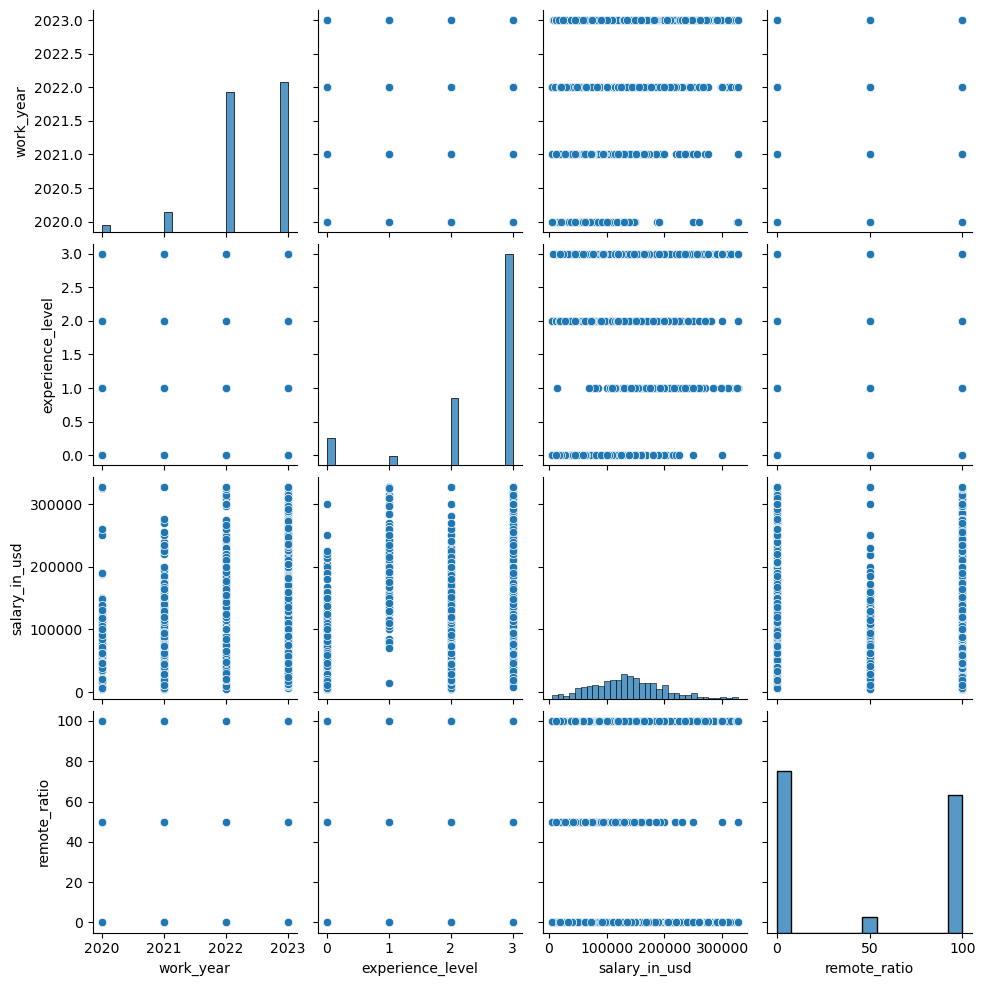

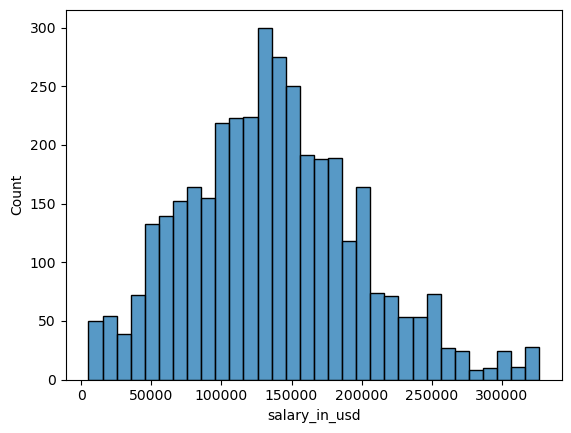

In [10]:
if df['experience_level'].dtype == object:
    label_encoder = LabelEncoder()
    df['experience_level'] = label_encoder.fit_transform(df['experience_level'])
sns.pairplot(df)
plt.show()

sns.histplot(df['salary_in_usd'])
plt.show()

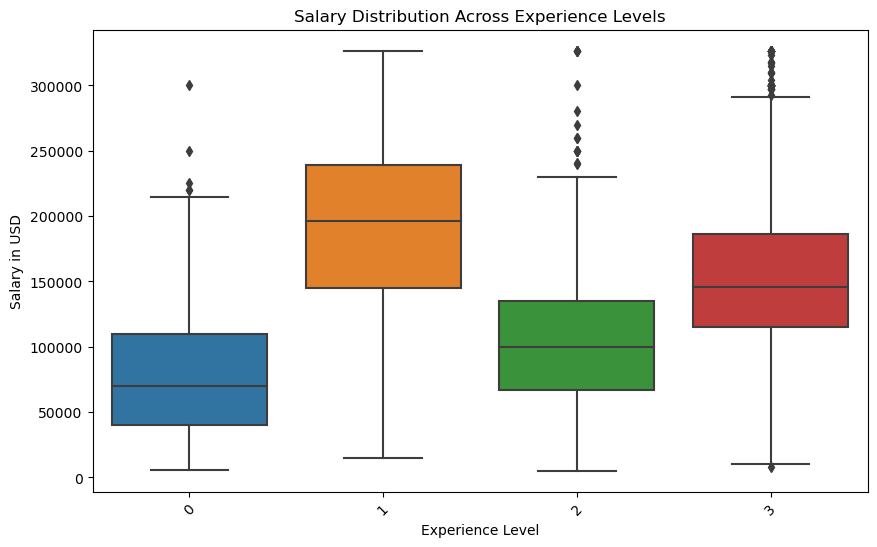

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary Distribution Across Experience Levels')
plt.xticks(rotation=45)
plt.show()

# Convert Categorical data to numerical data

In [12]:
unique_values = df['employment_type'].unique()
unique_values
#FT (FULLTIME),,CT(Contract ),,FL(Freelance ),PT(Part-Time)

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [13]:
mapping = {'FT': 0, 'CT': 1, 'FL': 2,'PT':4}
df['employment_type'] = df['employment_type'].map(mapping)

In [14]:
unique_values = df['company_size'].unique()
unique_values

array(['L', 'S', 'M'], dtype=object)

In [15]:
mapping = {'S': 0, 'M': 1, 'L': 2}
df['company_size'] = df['company_size'].map(mapping)

In [16]:
unique_values = df['experience_level'].unique()
unique_values
#SE(Senior Level 5-10 YEARS),,MI(Mid Level 2-5 YEARS),,EN(ENTRY LEVEL LESS THAN 2 YEARS),,EX(Executive Level AS CEO)

array([3, 2, 0, 1])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         3755 non-null   int64  
 1   experience_level  3755 non-null   int32  
 2   employment_type   3755 non-null   int64  
 3   job_title         3755 non-null   object 
 4   salary_in_usd     3755 non-null   float64
 5   remote_ratio      3755 non-null   int64  
 6   company_size      3755 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 190.8+ KB


# Normalizing numerical data

In [18]:
x = df[['experience_level', 'salary_in_usd']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Apply elbow method

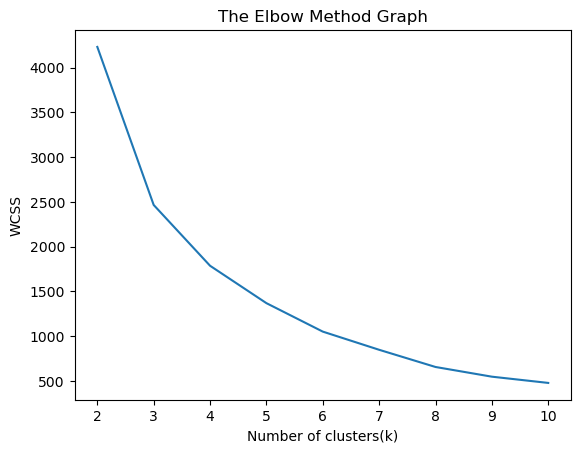

In [19]:
wcss_list = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  
    kmeans.fit(X_scaled)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss_list)
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('WCSS')  
plt.show()

In [20]:
optimal_clusters = 3

# the model

In [21]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

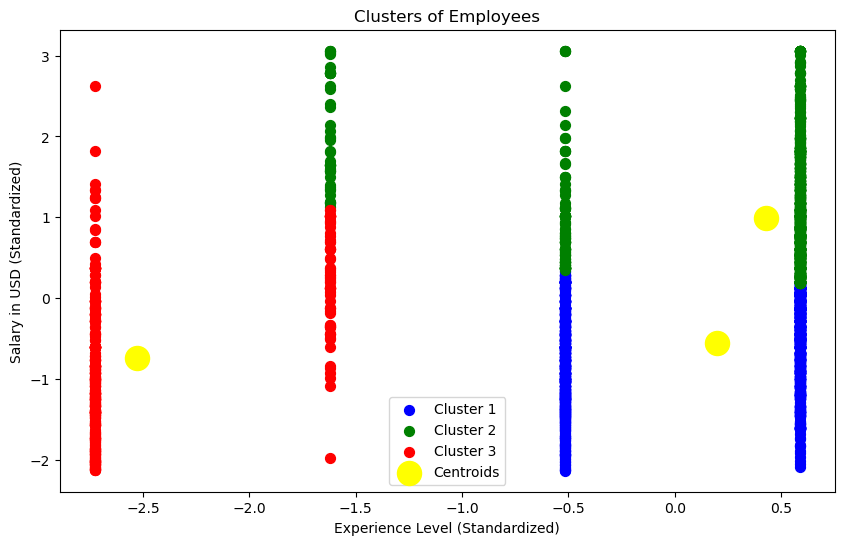

Silhouette Score for cluster_label: 0.45029015311070875


In [22]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  
for i in range(kmeans.n_clusters):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.xlabel('Experience Level (Standardized)')
plt.ylabel('Salary in USD (Standardized)')
plt.title('Clusters of Employees')
plt.legend()
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for cluster_label: {silhouette_avg}")

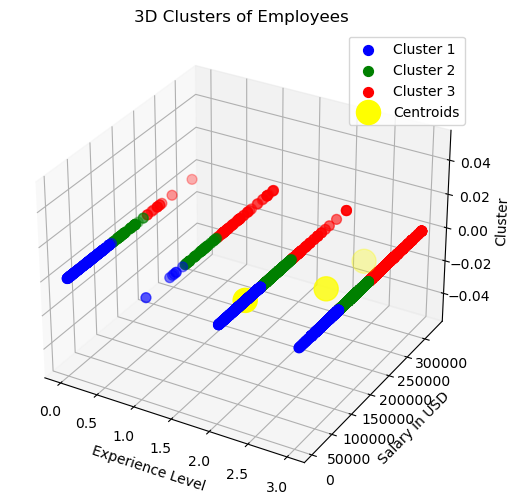

In [23]:
from mpl_toolkits.mplot3d import Axes3D  


X = df[['experience_level', 'salary_in_usd']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  

colors = ['blue', 'green', 'red']

for i in range(kmeans.n_clusters):
    data = X[labels == i]
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], zs=0, zdir='z', s=50, c=colors[i], label=f'Cluster {i+1}')

ax.scatter(centroids[:, 0], centroids[:, 1], zs=0, zdir='z', s=300, c='yellow', label='Centroids', depthshade=True)

ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
ax.set_zlabel('Cluster') 
ax.set_title('3D Clusters of Employees')
ax.legend()

plt.show()



# Evaluate the model

In [24]:
silhouette_avg = silhouette_score(df[['salary_in_usd']], df['experience_level'])
print(f"Silhouette Score for cluster_label: {silhouette_avg}")

Silhouette Score for cluster_label: -0.07866007000467147


In [25]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.3104117604031433
Calinski-Harabasz Index: 1667.3018940947388
Davies-Bouldin Index: 1.19988099549594


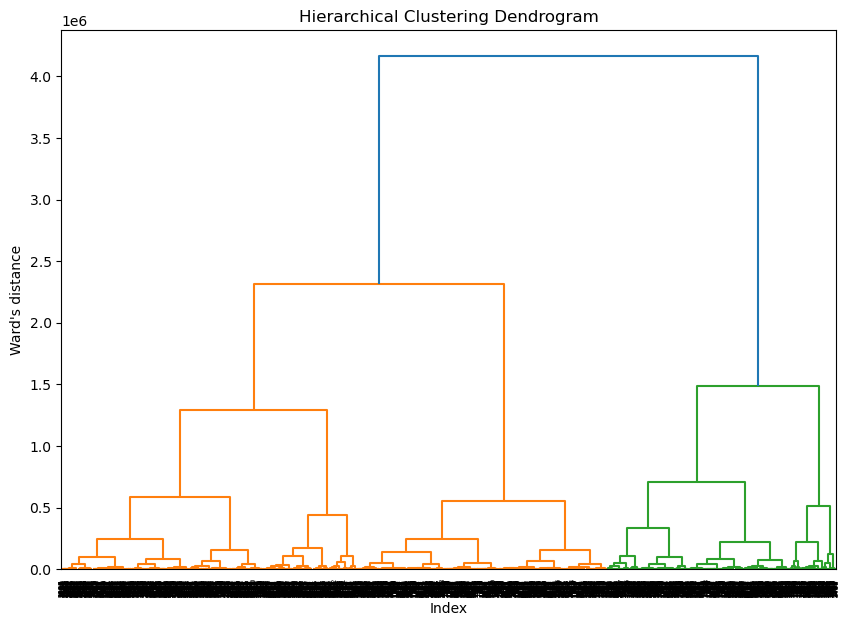

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = df[['experience_level', 'salary_in_usd']]

linked = linkage(X, 'ward')  

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=X.index, distance_sort='descending', show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s distance')
plt.show()

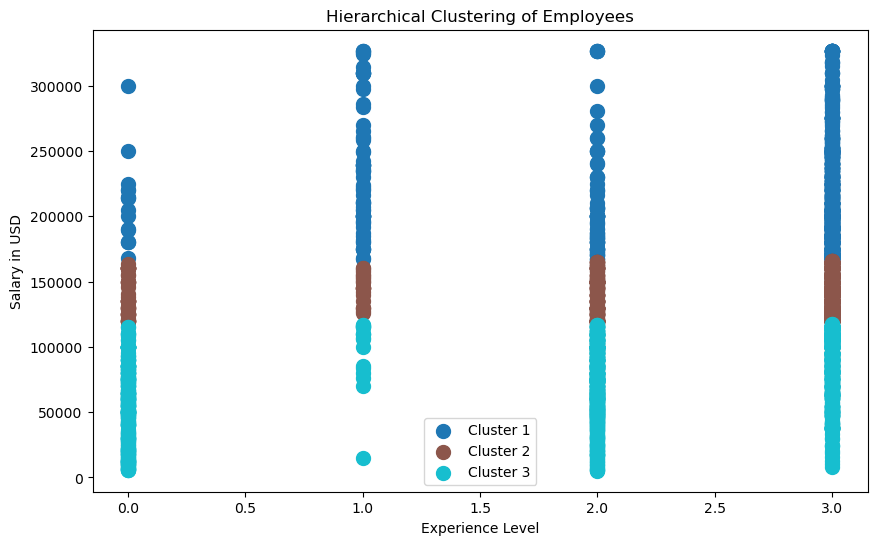

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


X = df[['experience_level', 'salary_in_usd']]
linked = linkage(X, 'ward')
clusters = fcluster(linked, 3, criterion='maxclust')

plt.figure(figsize=(10, 6))

colormap = plt.cm.get_cmap('tab10', max(clusters))

for i in range(1, max(clusters) + 1):
    plt.scatter(X[clusters == i]['experience_level'], X[clusters == i]['salary_in_usd'], s=100, 
                color=colormap(i-1), label=f'Cluster {i}')

plt.title('Hierarchical Clustering of Employees')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend()
plt.show()

# pipeline


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'X' is your feature matrix

# Create a pipeline with three steps:
# 1. Standardize the features
# 2. Apply PCA for dimensionality reduction
# 3. Use KMeans for clustering
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),  # Adjust the number of components as needed
    ('kmeans', KMeans(n_clusters=3))  # Adjust the number of clusters as needed
])

pipeline.fit(X)

labels = pipeline.predict(X)



In [34]:
df['Culsters'] = labels
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Culsters
0,2023,3,0,Principal Data Scientist,85847.0,100,2,0
1,2023,2,1,ML Engineer,30000.0,100,0,0
2,2023,2,1,ML Engineer,25500.0,100,0,0
3,2023,3,0,Data Scientist,175000.0,100,1,2
4,2023,3,0,Data Scientist,120000.0,100,1,0
